# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, how="left") 
                       

# Display the data table for preview
mouse_metadata.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16

In [2]:
# Checking the number of mice.
Num_of_mice=combined_df.groupby ("Mouse ID").nunique()
len(Num_of_mice)

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
IDTime_df=combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice = IDTime_df['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = combined_df.loc[combined_df["Mouse ID"] == "g989"]
dup_mouse_data

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=combined_df.loc[combined_df["Mouse ID"] != "g989"]
clean_data.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [6]:
# Checking the number of mice in the clean DataFrame.
Num_of_clean_mice=clean_data.groupby ("Mouse ID").nunique()
len(Num_of_clean_mice)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Mean_Tumor_Volume = clean_data.groupby(["Drug Regimen"]) ["Tumor Volume (mm3)"].mean()
Median_Tumor_Volume = clean_data.groupby(["Drug Regimen"]) ["Tumor Volume (mm3)"].median()
Tumor_Volume_Variance = clean_data.groupby(["Drug Regimen"]) ["Tumor Volume (mm3)"].var()
Tumor_Volume_Std = clean_data.groupby(["Drug Regimen"]) ["Tumor Volume (mm3)"].std()
Tumor_Volume_SEM = clean_data.groupby(["Drug Regimen"]) ["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    "Mean_Tumor_Volume": Mean_Tumor_Volume,
    "Median_Tumor_Volume": Median_Tumor_Volume,
    "Tumor_Volume_Variance": Tumor_Volume_Variance,
    "Tumor_Volume_Std. Dev.": Tumor_Volume_Std,
    "Tumor_Volume_Std. Err.":Tumor_Volume_SEM
    })

summary_stats

Mean_Tumor_Volume  Median_Tumor_Volume  Tumor_Volume_Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor_Volume_Std. Dev.  Tumor_Volume_Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_data.groupby(["Drug Regimen"]) ["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
summary_statistics

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
no_of_rows= clean_data["Drug Regimen"].value_counts()

Text(0, 0.5, '# of Observed Mouse Timepoints')

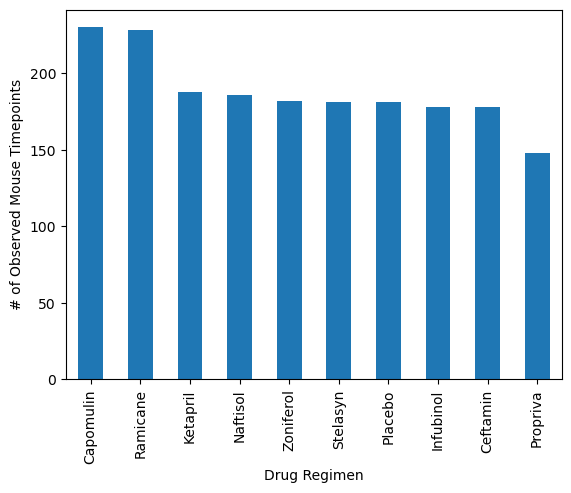

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
ax=no_of_rows.plot(kind='bar')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('# of Observed Mouse Timepoints')

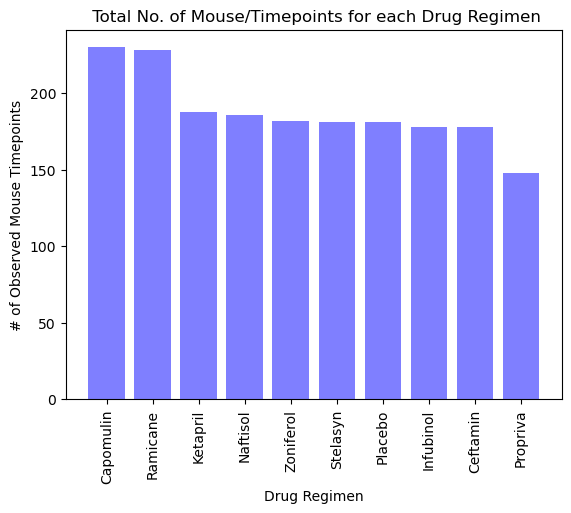

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(no_of_rows.index.values, no_of_rows.values, color='b', alpha=0.5, align="center")

#tick_locations = [value for value in x_ax]
plt.xticks(rotation =90)

#plt.xlim(-0.75, len(x_axis)-0.25)
#plt.ylim(0, max(users)+5000)
plt.title(" Total No. of Mouse/Timepoints for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [12]:
# distribution of female versus male mice using Pandas
Gender=  clean_data['Sex'].value_counts()

<function matplotlib.pyplot.show(close=None, block=None)>

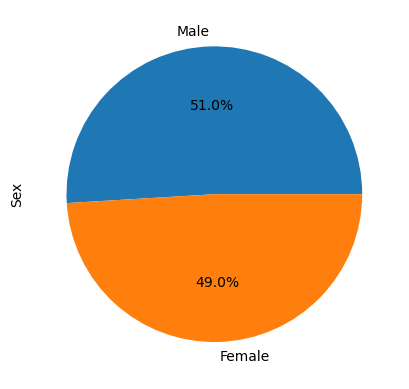

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Gender=  clean_data['Sex'].value_counts()
bx=Gender.plot(kind='pie', autopct='%1.1f%%')

plt.show

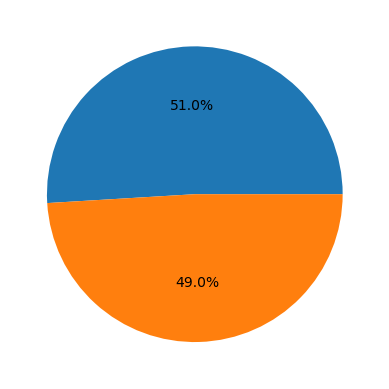

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(Gender,autopct="%1.1f%%", shadow=False)
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the DataFrame for the treatment regimens of interest
filtered_df = clean_data[clean_data['Drug Regimen'].isin(treatment_regimens)]


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = filtered_df.groupby('Mouse ID')['Tumor Volume (mm3)'].last()

# Get the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

In [16]:
# Merge the group DataFrame with the original DataFrame
merged_df = pd.merge(last_timepoint, clean_data, on=['Mouse ID', 'Timepoint'])

# Filter the merged DataFrame for the treatment regimens of interest
final_tumor_volume = merged_df[merged_df['Drug Regimen'].isin(treatment_regimens)]

# Display the final tumor volume of each mouse for the selected treatment regimens
final_tumor_volume

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
3       a275         45           62.999356                 3     Ceftamin   
6       a411         45           38.407618                 1     Ramicane   
7       a444         45           43.047543                 0     Ramicane   
..       ...        ...                 ...               ...          ...   
238     y769         45           68.594745                 4     Ceftamin   
239     y793         45           31.896238                 2    Capomulin   
240     y865         45           64.729837                 3     Ceftamin   
244     z578         45           30.638696                 0     Ramicane   
245     z581         45           62.754451                 3    Infubinol   

        Sex  Age_months  Weight (g)  
0    Female          20          23  
1    Female          21          25  
3    Female          20          28  
6      Male           3          22  
7    Female          10          25  
..      ...         ...         ...  
238  Female           6          27  
239    Male          17          17  
240    Male          23          26  
244    Male          11          16  
245  Female          24          25  

[100 rows x 8 columns]

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
for treatment in treatment_regimens :

    # Create empty list to fill with tumor vol data (for plotting)
    tumor_volume_data = []
 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_data.append(subset)  
  
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    quartiles = subset.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    
   
    print(f"{treatment}'s potential outliers:{outliers}.")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64).
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64).
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64.
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64).


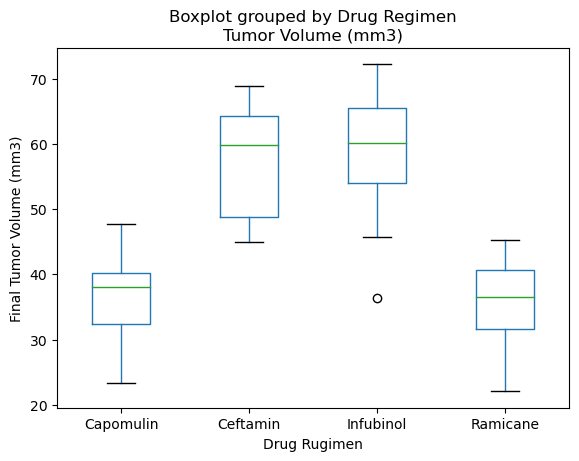

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
final_tumor_volume.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False)

plt.xlabel('Drug Rugimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

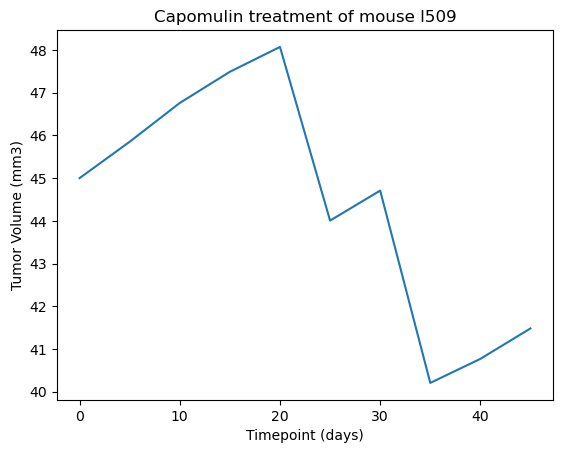

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Set the mouse ID and treatment of interest
mouse_id = 'l509'
drug= 'Capomulin'

# Filter the DataFrame for the specific mouse and treatment
filtered_Capo= clean_data[(clean_data['Drug Regimen'] == drug)
                                  & (clean_data['Mouse ID'] == mouse_id)] 
# Generate the line plot

plt.plot(filtered_Capo['Timepoint'], filtered_Capo['Tumor Volume (mm3)'])

# Set x and y labels
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Set title for the chart
plt.title('Capomulin treatment of mouse l509')

# Display the plot
plt.show()


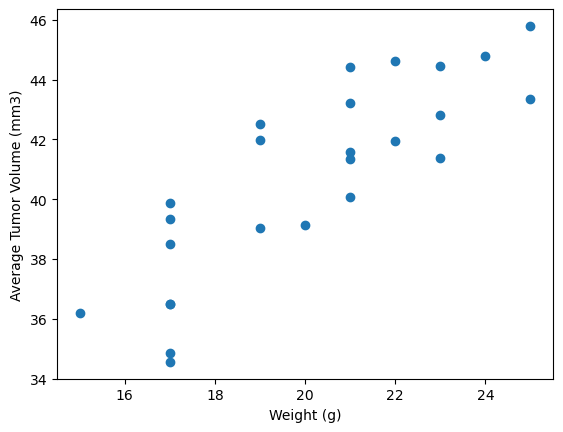

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the DataFrame for the Capomulin regimen
Capo = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_vol = Capo.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the mouse weight
merger = pd.merge(avg_tumor_vol, Capo[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left').drop_duplicates()

# Create the scatter plot
plt.scatter(merger['Weight (g)'], merger['Tumor Volume (mm3)'])

# Set x and y labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


# Display the plot
plt.show()

## Correlation and Regression

 The correlation between mouse weight and the average tumor is 0.84


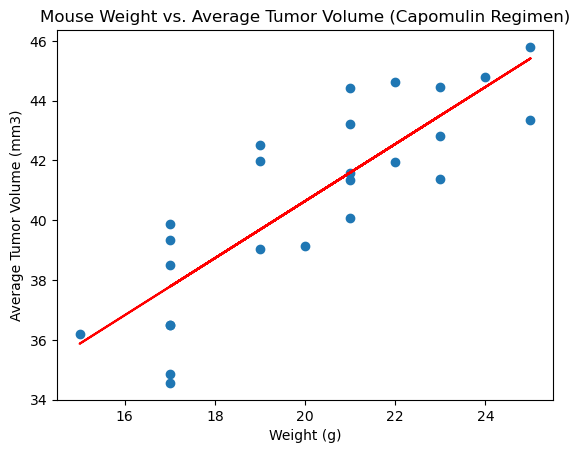

In [21]:
# Calculate the correlation coefficient and a linear regression model 
x= merger['Weight (g)']
y=merger['Tumor Volume (mm3)']

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(x, y)
print(f" The correlation between mouse weight and the average tumor is {round(correlation[0],2)}")

# Set title for the chart
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

# Calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Add the regression line to the plot
regress_values=slope * x + intercept

#Line Equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create the scatter plot
plt.scatter(x,y)

#plt.plot(x_values,regress_values,"r-")
plt.plot(x,regress_values, color='red')

#Annotation
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Set x and y labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


# Display the plot
plt.show()

